<a href="https://colab.research.google.com/github/Mulac/TDA-MNIST/blob/master/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import mnist
from timeit import default_timer as timer

# Prepare Data

  1. Download the training and test date from tensorflow
  2. Flatten the 2D 28 x 28 pixel arrays into a 1D 784 pixel array


In [4]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

train_data_flat = []
for datapoint in train_data:
  train_data_flat.append(datapoint.flatten())

test_data_flat = []
for datapoint in test_data:
  test_data_flat.append(datapoint.flatten())

11493376/11490434 [==============================] - 0s 0us/step


# Finding optimal parameters
By changing the number of trees in the forest we can try to determine the optimal number of trees. The following cell: 
 - Trains a random forest model, incrementing the number of trees by 5 on each iteration
 - The time and accuracy of each model is recorded

In [ ]:
scores = {}
train_times = {}
for i in range (5,105,5):
  rf_model = RandomForestClassifier(n_estimators=i)
  start = timer()
  rf_model.fit(train_data_flat,train_labels)
  end = timer()
  scores[str(i)] = rf_model.score(test_data_flat,test_labels)
  train_times[str(i)] = (end-start)


In [ ]:
for x in scores:
  print(f"Num of trees: {x} \tAccuracy: {scores[x]} \tTime:{train_times[x]:.2f}s\n")

Num of trees: 5 	Accuracy: 0.9229 	Time:2.31s

Num of trees: 10 	Accuracy: 0.9473 	Time:4.48s

Num of trees: 15 	Accuracy: 0.9575 	Time:6.79s

Num of trees: 20 	Accuracy: 0.9593 	Time:8.87s

Num of trees: 25 	Accuracy: 0.9641 	Time:11.17s

Num of trees: 30 	Accuracy: 0.9641 	Time:13.37s

Num of trees: 35 	Accuracy: 0.9629 	Time:15.76s

Num of trees: 40 	Accuracy: 0.966 	Time:18.24s

Num of trees: 45 	Accuracy: 0.9676 	Time:19.91s

Num of trees: 50 	Accuracy: 0.9679 	Time:22.41s

Num of trees: 55 	Accuracy: 0.9668 	Time:24.54s

Num of trees: 60 	Accuracy: 0.9668 	Time:26.89s

Num of trees: 65 	Accuracy: 0.9677 	Time:29.10s

Num of trees: 70 	Accuracy: 0.969 	Time:31.13s

Num of trees: 75 	Accuracy: 0.9692 	Time:33.40s

Num of trees: 80 	Accuracy: 0.9696 	Time:35.62s

Num of trees: 85 	Accuracy: 0.9687 	Time:37.41s

Num of trees: 90 	Accuracy: 0.9705 	Time:39.97s

Num of trees: 95 	Accuracy: 0.9688 	Time:42.59s

Num of trees: 100 	Accuracy: 0.9714 	Time:44.33s



It is clear to see that as you increase the number of trees in the model the accuracy and time taken to train the model increases aswell.
However, the accuracy of the model plateaus around 97% accuracy.

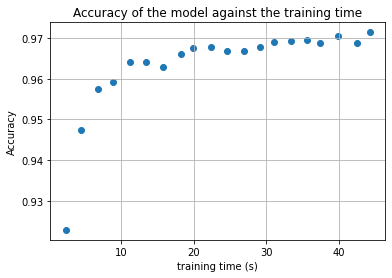

In [ ]:
times = list(train_times.values())
accuracy = list(scores.values())
trees = list(scores.values())
fig, ax = plt.subplots()
ax.scatter(times,accuracy)
ax.set(xlabel="training time (s)", ylabel ="Accuracy", title="Accuracy of the model against the training time")
ax.grid()
plt.show()

The graph shows that an accuracy of 96.4% can be achieved in 11 seconds. This corresponds to 25 trees in the forest. A slightly higher accuracy can be achieved by increasing the number of trees however this greatly increases the training time.

# Testing the Model

The results show a 97.1% accuracy with N-estimators set to 100

In [6]:
optimal_rf_model = RandomForestClassifier(n_estimators=25)
optimal_rf_model.fit(train_data_flat,train_labels)
print(optimal_rf_model.score(test_data_flat,test_labels))


0.9643


In [7]:
results = optimal_rf_model.predict(test_data_flat)
print("K Nearest Neighbour Results")
print(classification_report(test_labels, results))

K Nearest Neighbour Results
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.96      0.95      1032
           3       0.95      0.95      0.95      1010
           4       0.96      0.97      0.97       982
           5       0.96      0.95      0.95       892
           6       0.97      0.98      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

